In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Panda plot sample
# https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

# 1 Process the raw stock trading history csv file
## 1.1 Load dataframe and add calculation NAV column

In [2]:
df = pd.read_csv("../data/btc_gbtc_hour_3months_combined_21_03_2021.csv", sep=",", index_col='begins_at')
df[:3]
# _x is btc price, _y is gbtc price, btc trades with 24x7 but gbtc only trades when stock market open.

,open_price_x,close_price_x,high_price_x,low_price_x,volume_x,session_x,interpolated_x,symbol_x,open_price_y,close_price_y,high_price_y,low_price_y,volume_y,session_y,interpolated_y,symbol_y
begins_at,,,,,,,,,,,,,,,,
2020-12-21T21:00:00Z,22883.895,23147.72,23262.055,22705.065000,0,reg,False,BTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21T22:00:00Z,23116.650,22997.46,23363.705,22980.150000,0,reg,False,BTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21T23:00:00Z,23190.810,22757.98,23301.890,22631.631014,0,reg,False,BTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# add btc nav per share column
btc_per_share = 0.00094607

df["nav"] = df["open_price_x"] * btc_per_share
df[:4]

,open_price_x,close_price_x,high_price_x,low_price_x,volume_x,session_x,interpolated_x,symbol_x,open_price_y,close_price_y,high_price_y,low_price_y,volume_y,session_y,interpolated_y,symbol_y,nav
begins_at,,,,,,,,,,,,,,,,,
2020-12-21T21:00:00Z,22883.895,23147.72,23262.055,22705.065000,0,reg,False,BTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.649767
2020-12-21T22:00:00Z,23116.650,22997.46,23363.705,22980.150000,0,reg,False,BTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.869969
2020-12-21T23:00:00Z,23190.810,22757.98,23301.890,22631.631014,0,reg,False,BTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.940130
2020-12-22T00:00:00Z,22725.005,22562.82,23036.395,22461.105795,0,reg,False,BTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.499445


<AxesSubplot:xlabel='begins_at'>

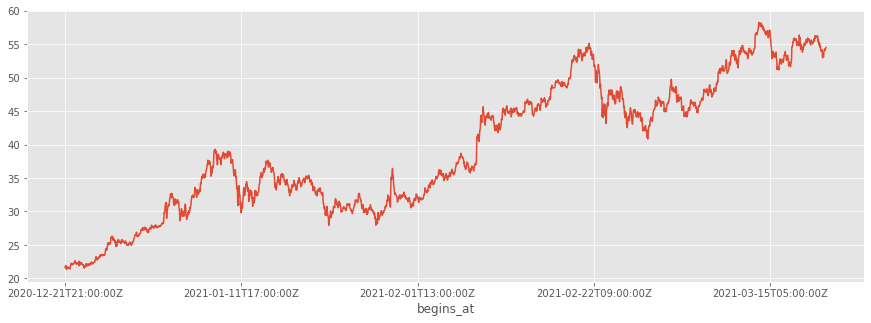

In [4]:
# btc hourly price history graph (2020-12 / 2021-3)
df["nav"].plot()

<AxesSubplot:xlabel='begins_at'>

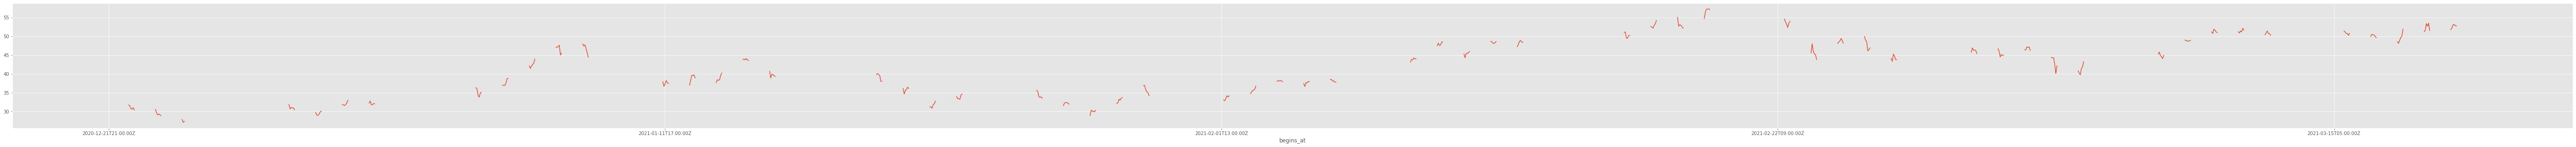

In [5]:
# btc hourly price history graph (2020-12 / 2021-3)

df["open_price_y"].plot(figsize=(100, 5))

<AxesSubplot:xlabel='begins_at'>

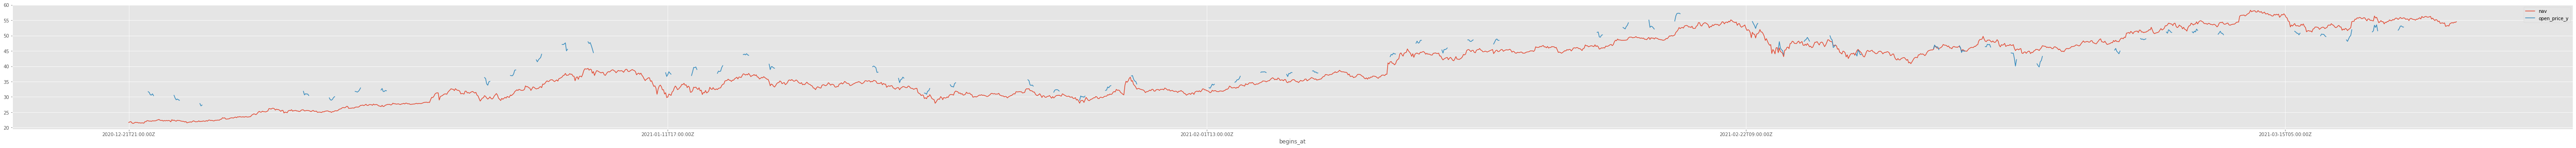

In [6]:
# hourly chart comparison
import matplotlib.dates as mdates

df.loc[:,['nav','open_price_y']].plot(figsize=(100, 5), grid=True, x_compat=True)

<AxesSubplot:xlabel='begins_at'>

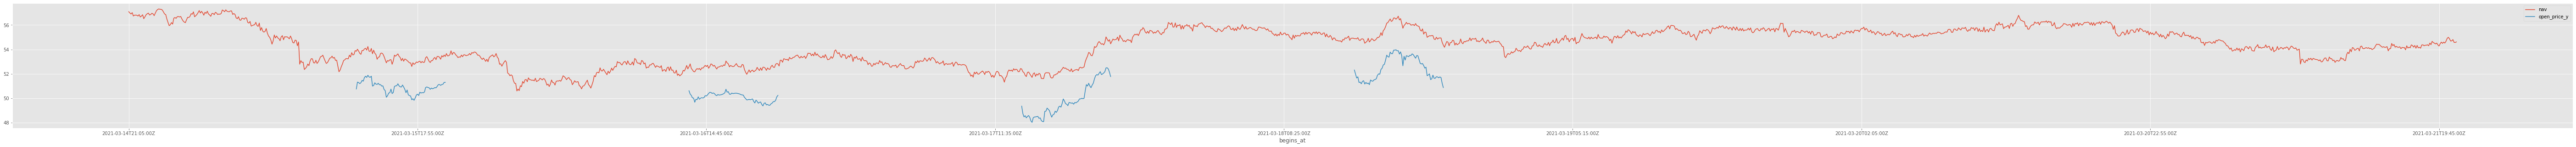

In [7]:
# 5 minutes chart comparison
df_5min = pd.read_csv("../data/btc_gbtc_5min_weekly_combined_21_03_2021.csv", sep=",", index_col='begins_at')
df_5min["nav"] = df_5min["open_price_x"] * btc_per_share
df_5min.loc[:,['nav','open_price_y']].plot(figsize=(100, 5), grid=True, x_compat=True)

In [35]:
# Try use plotly for interactive graph
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"

fig = df_5min.loc[:,['nav','open_price_y']].plot.line()
fig.update_layout(
    autosize=False,
    width=5000,
    height=800,
    paper_bgcolor="LightSteelBlue",
)
                 
fig.show()

In [34]:
# daily chart comparison
df_day = pd.read_csv("../data/btc_gbtc_daily_year_combined_21_03_2021.csv", sep=",", index_col='begins_at')
df_day["nav"] = df_day["open_price_x"] * btc_per_share

# import plotly.express as px
# df = px.data.stocks()

# fig = px.line(df_day, x="date", y=['nav', 'open_price_y'],
#               hover_data={"begins_at": "|%B %d, %Y"},
#               title='custom tick labels with ticklabelmode="period"')
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y",
#     ticklabelmode="period")
# fig.show()

fig = df_day.loc[:,['nav','open_price_y', 'close_price_y']].plot.line()
fig.update_layout(
    autosize=False,
    width=5000,
    height=800,
    paper_bgcolor="LightSteelBlue",
)
                 
fig.show()

In [ ]:
# Thoughts
# Check premium, low premium (ex: -5%) could be buying areas, high premium (+/- 1%) could be selling areas. 
#  Need to verify the expected number. 
# The thoughts is, arbitrage suppose to buy when the premium is low while retail buyer is selling.  arbitrage suppose to sell when retail buyer wants to buy. 
# So we could use premium change rates as an reverse indicator to decide to buy or sell0